# Final Project Submission

Florian Salihovic

## Importing Libraries

Libraries used are important at the notebooks head to provide an easy overview of required packages.

In [189]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as linear_model

import folium
from folium.plugins import HeatMap

from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Understanding Business Requirements

### Technical details
R-squared/R-squared adjusted should be between .7 and .9.

## Data Mining

| Key               | Description                                        | Expected Data Type       |
|:------------------|:---------------------------------------------------|:-------------------------|
| id                | unique identified for a house                      | numeric, positive        |
| date              | date house was sold                                | pandas.Timestamp         |
| price             | is prediction target                               | numeric, positive        |
| bedroomsNumber    | number of bedrooms/house                           | numeric, positive        |
| bathroomsNumber   | of bathrooms/bedrooms                              | numeric, positive        |
| sqft_livingsquare | footage of the home                                | numeric, positive        |
| sqft_lotsquare    | footage of the lot                                 | numeric, positive        |
| floorsTotal       | floors (levels) in house                           | numeric, positive        |
| waterfront        | has a view to a waterfront                         | boolean, optional           |
| view              | has been viewed                                    | numeric, positive           |
| condition         | how good the condition is ( overall )              | numeric, positive           |
| grade             | overall grade given to the housing unit, based on King County grading system | numeric, positive |
| sqft_above        | square footage of house apart from basement        | numeric, positive, optional |
| sqft_basement     | square footage of the basement                     | numeric, positive           |
| yr_built          | built year                                         | numeric, positive           |
| yr_renovated      | year when house was renovated                      | numeric, positive, optional |
| zipcode           | zip code                                           | numeric, positive |
| lat               | Latitude coordinate                                | numeric, optional |
| long              | Longitude coordinate                               | numeric, optional |
| sqft_living15     | ___initially___: square footage of interior housing living space for the nearest 15 neighbors
| | ___corrected___: if there have been any renovations this value may be different to sqft_living | numeric, optional |
| sqft_lot15        | ___initially___:square footage of the land lots of the nearest 15 neighbors | numeric, optional |
| | ___corrected___: if there have been any renovations this value may be different to sqft_living | numeric, optional |


##### Additional Credits And Sources
- [Variable Explanation, kaggle.com](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/23194)
- [King County Home Sales: Analysis and the limitations of a multiple regression model, JuanPablo Murillo, February 23, 2016](https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html)

### Simple File Line Count

Using `wc -l King_County_House_prices_dataset.csv` we get direct feedback over the number of lines in a file. This could be a useful comparison value in case the formatting of the dataset was broken.

In [190]:
!wc -l King_County_House_prices_dataset.csv

   21598 King_County_House_prices_dataset.csv


### Exploring The Dataset With Pandas

In [191]:
import pandas as pd

In [192]:
df = pd.read_csv('King_County_House_prices_dataset.csv', delimiter=",")

#### DataFrame: Basic Information

Understanding the values is important as these define the operations we can perform (consistently) on the DataFrame. Basic information about the DataFrame can be obtained by calling [DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) and [DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [50]:
rows, columns = df.shape

In [51]:
print("Rows: {}, columns: {}".format(rows, columns))

Rows: 21597, columns: 21


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [53]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

#### DataFrame: Basic Inspections

[DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [DataFrame.tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) provide a first glance on the data contained by the DataFrame.

In [54]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [55]:
df.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
21592      1131     3.0         0.0   0.0     ...          8        1530   
21593      5813     2.0         0.0   0.0     ...          8        2310   
21594      1350     2.0         0.0   0.0     ...          7        1020   
21595      2388     2.0         NaN   0.0     ...          8        1600   
21596      1076     2.0         0.0   0.0     ...          7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

### Data Cleaning

`date` is a string following the pattern `month/date/year`. It might be useful to convert the value later into a [pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) as it may provide additional or more useful comparison mechanics.

In [56]:
df['date'] = df['date'].apply(pd.to_datetime)

`zipcode` appears to be an integer, but it serves more as an id. Numerical operations can't be done on zipcodes, hence this will be assigned to type string.

In [57]:
df['zipcode'] = df['zipcode'].apply(str)

Inspecting the DataFrame we can see the format data rendered of `date` is different. `DataFrame.head` gives a first glance on the modified DataFrame while calling `DataFrame.info` shows the exact data types.

In [58]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(2)
memory

#### Searching For Null Values

In [60]:
df.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

Calling `df.isnull().sum().sort_values(ascending=False)` shows the columns which contain undefined/missing values:
- `yr_renovated`
- `waterfront`
- `view`

#### Explaining Null/NaN Values And Placeholders

##### yr_renovated

Not every house has been renovated. In some cases, the houses might be too old to take a renovation which has been done more than a decade ago, into consideration - it might also be unknown.

##### waterfront

As `waterfront` usually is a very revaluating ferature, thus I descide the value to be `0.0` when the value is missing in case it might be required in modelling a prediction

##### view

Similar to `waterfront`, `view` can also be revaluating value. This value will also be set to `0.0` in case it s required.

In [61]:
def missing_values_in_percent(feature):
    print('Null or undefined values for "{}: " {}%'
          .format(feature, 1 - df[feature].count() / len(df[[feature]])))

#### Unspecified/Missing Value: `sqft_basement`

In [62]:
unspecified_values = len(df[df['sqft_basement'] == '?'])
print('Missing values specified as "?": {}%'.format(unspecified_values / len(df)))

Missing values specified as "?": 0.021021438162707785%


In [63]:
def sqft_basement_correction(row):
    if row['sqft_above'] < row['sqft_living']:
        return row['sqft_living'] - row['sqft_above']
    return 0

df['sqft_basement'] = df.apply(sqft_basement_correction, axis = 1)

#### Unspecified/Missing Value: `yr_renovated`

In [64]:
missing_values_in_percent('yr_renovated')

Null or undefined values for "yr_renovated: " 0.1778950780200954%


##### Assumption

An object might not have been renovated, despite its age. Also, some renovations might not be identified as such, which might make it harder to set a date on it. In any case I decide to set the value to `0` to for further exploration.

In [65]:
df['yr_renovated'].fillna(0.0, inplace=True)

#### Adding Value: `is_renovated`

In order to simplify the EDA process, a short hand approach is taken to identify if renovations have an effect on the price by simply introducing the field `is_renovated` which serves as a simply indicator

In [66]:
def has_been_renovated(row):
    return row['yr_renovated'] > 0 or row['sqft_living15'] != row['sqft_living'] or row['sqft_lot15'] != row['sqft_lot']
        

df.reset_index()
df['is_renovated'] = df.apply(has_been_renovated, axis=1)

#### Unspecified/Missing Value: `waterfront`

In [67]:
missing_values_in_percent('waterfront')

Null or undefined values for "waterfront: " 0.11001527989998616%


As the rougly ten percent of the values are missing, the empty values are set to `0.0` as a default.

##### Assumption

When collecting the data, `waterfront` is general a very important feature of a house. From the potential buyers perspective, a location directly on a lake, big river or the sea could potentially increase the price or at least the interest.

Also, with regards of potential damage due to weather damage, the feature appears to be important to not be dealt with.

With more time, a location based test could provide a value with high resolution.

In [68]:
df['waterfront'].fillna(0, inplace=True)

#### Unspecified/Missing Value: `view`

In [69]:
missing_values_in_percent('view')

Null or undefined values for "view: " 0.0029170718155299147%


In [70]:
df['view'].fillna(0.0, inplace=True)

### Data Exploration

#### Prediction Target: `price`

As the price is prediction target, it is relevant to understand the data and find die independent variables.

In [71]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [76]:
sns.distplot(df['price'], fit=norm);

(mu, sigma) = norm.fit(df['price'])
print('μ = {:.2f} // mu'.format(mu)) # mu
print('σ = {:.2f} // sigma'.format(sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

NameError: name 'norm' is not defined

##### Skewness

In [77]:
df['price'].skew()

4.023364652271239

The skewness is quite low, which makes the distribution of the data "quite" symmetrical.

##### Kurtosis

In [78]:
df['price'].kurt()

34.54135857673376

This high value indicates the data to be quite tail heavy, which makes sense as we see a max value being 10 times higher than the price's mean.

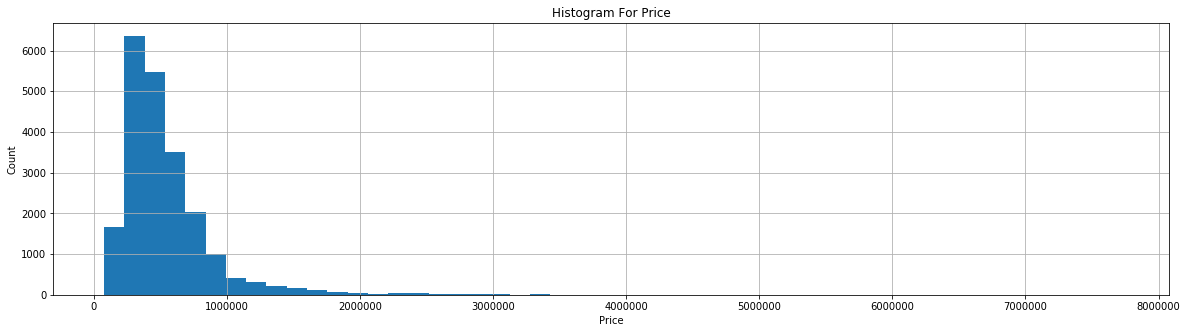

In [79]:
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram For Price')

df['price'].hist(bins=50, figsize=(20, 5));

In [80]:
from numpy.random import normal
import numpy as np
from scipy.stats import norm

In [81]:
μ, σ = norm.fit(df['price'])

In [82]:
print("mean: {}, variance (): {}".format(μ, σ))

mean: 540296.5735055795, variance (): 367359.634929548


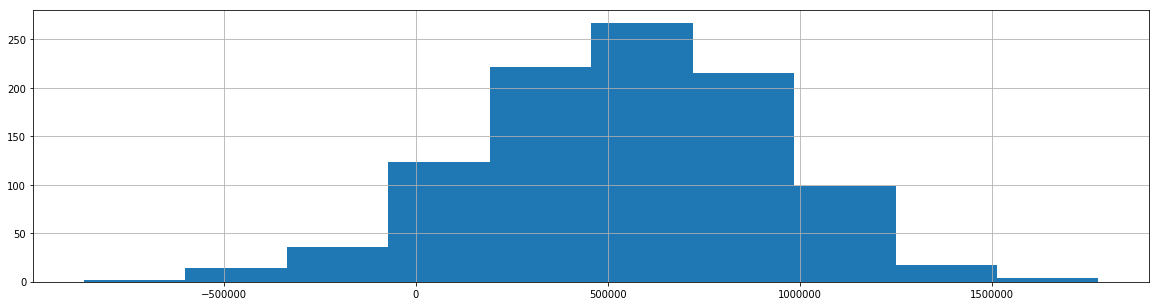

In [83]:
f, ax = plt.subplots(figsize=(20, 5))
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

House prices are determined in a naive way by the houses location and its quality. It is therefor interesting to understand, in which district a lot of offers are availble and how the houses are generally distributed.

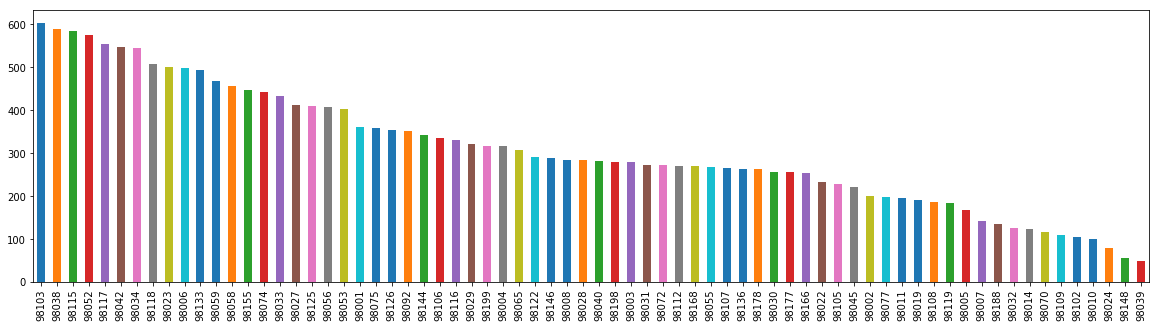

In [84]:
df['zipcode'].value_counts().plot(kind='bar', figsize=(20,5));

The distribution of sales throughout the zipcodes.

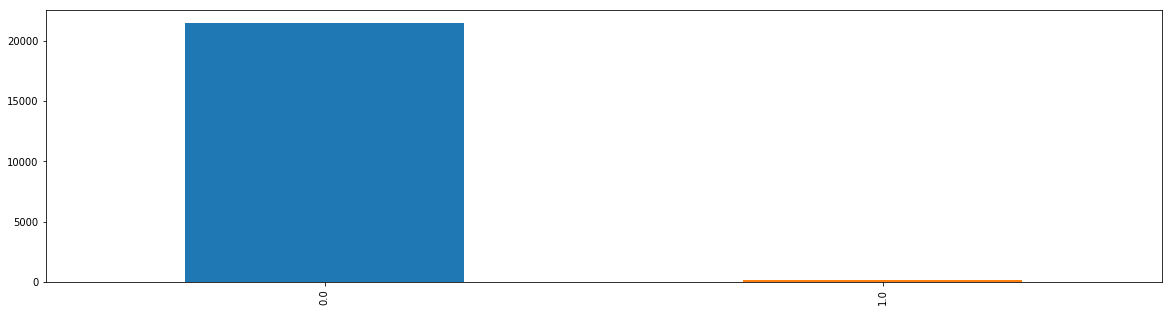

In [85]:
df['waterfront'].value_counts().plot(kind='bar', figsize=(20,5));

#### Finding Correlations

Finding relations between values, or correlations between features is important to get an understanding of which featues might influence the price. Using a correlation matrix simplifies the understanding of corelated values, which influence the price.

In [86]:
def heatmap(matrix):
    """
    Utility function for printing a heatmap with seaborn.
    
    :param matrix: The correlation matrix to print. 
    """
    sns.set(context="paper",
            font="monospace")
    sns.heatmap(matrix,
            annot=True,
            vmax=1,
            vmin=.2,
            cmap=sns.diverging_palette(255, 10, as_cmap=True),
            square=True,
            linewidths=.2);

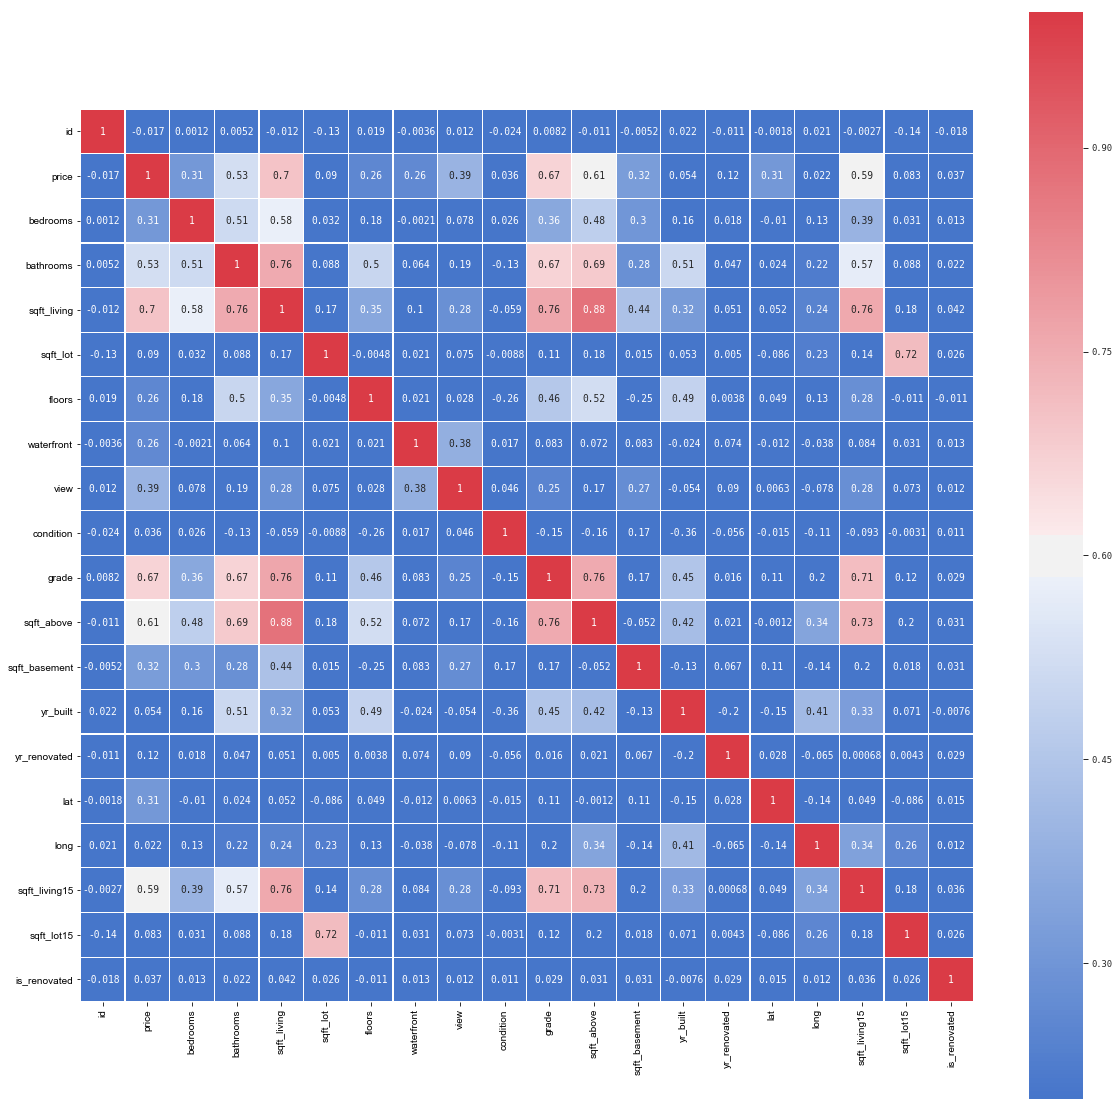

In [87]:
f, ax = plt.subplots(figsize=(20, 20))
heatmap(df.corr())

The correlation matrix shows nicely, how several features are related with each other. Strong correlations stand out while it is easy to recognize, which features are not releated to each other at all.

#### Observations

Not many features appear to correlate with `price` with a correlation value of `0.5+`, with a maximum of `0.7`.

- `price` correlates with `sqft_living`, `sqft_above`, `sqft_living15`  and `grade`
- `grade` correlates with `sqft_living` and `sqft_above` 
- `sqft_living` can be consolidated with `sqft_above`

`sqft_living` and `sqft_living15` are not yet consolidated as there are ambiguities regarding `sqft_living15` semantics:
- `sqft_living` in 2015
- the mean of 15 available houses in the neighbourhood's houses `sqft_living`


#### Correlations For Price

As `price` is the dependent variable, a dedicated view on price is rendered to identify features of interest easily. 

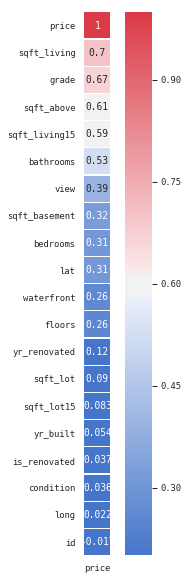

In [88]:
f, ax = plt.subplots(figsize=(5, 10))
heatmap(df.corr()[['price']].sort_values(by=['price'], ascending=False));

Features which appear to be good house price predictors are

| Feature       | Correlation Value|
|:--------------|-----------------:|
| sqft_living   | .7               |
| grade         | .67              |
| sqft_living15 | .59              |
| bathrooms     | .53              |

In [215]:
def foilum_heat_map(data_frame, grade=None):
    folium_map = folium.Map(location=[df.iloc[0]['lat'], df.iloc[0]['long']])

    if grade is None:
        data = df[['lat', 'long', 'price']]
    else:
        data = df[df['grade'] == grade][['lat', 'long', 'price']]

    HeatMap(data=data
        .groupby(['lat', 'long'])
        .sum()
        .reset_index()
        .values.tolist(),
        radius=1.5, blur=1,
        zoom_start=1,
        max_zoom=13).add_to(folium_map);

    return folium_map

In [216]:
foilum_heat_map(df)

In [217]:
foilum_heat_map(df, 5)

In [92]:
foilum_heat_map(df, 6)

In [93]:
foilum_heat_map(df, 7)

In [94]:
foilum_heat_map(df, 8)

In [95]:
foilum_heat_map(df, 9)

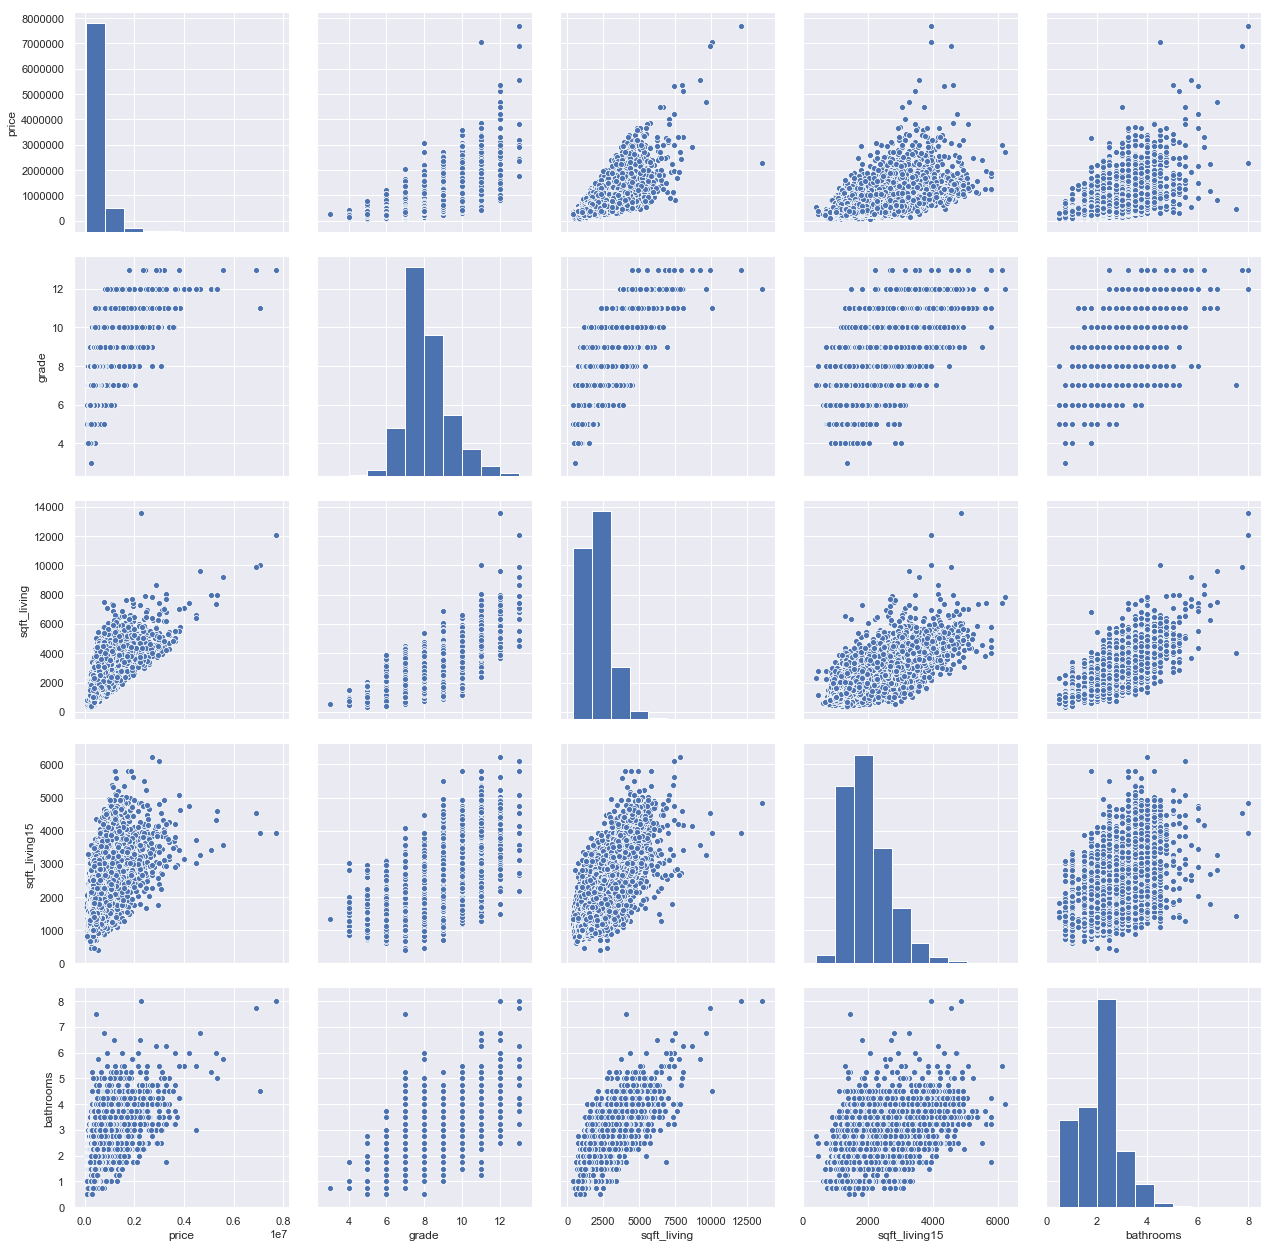

In [96]:
sns.set()
cols = ['price', 'grade', 'sqft_living', 'sqft_living15', 'bathrooms']
sns.pairplot(df[cols], height = 3.5)
plt.show();

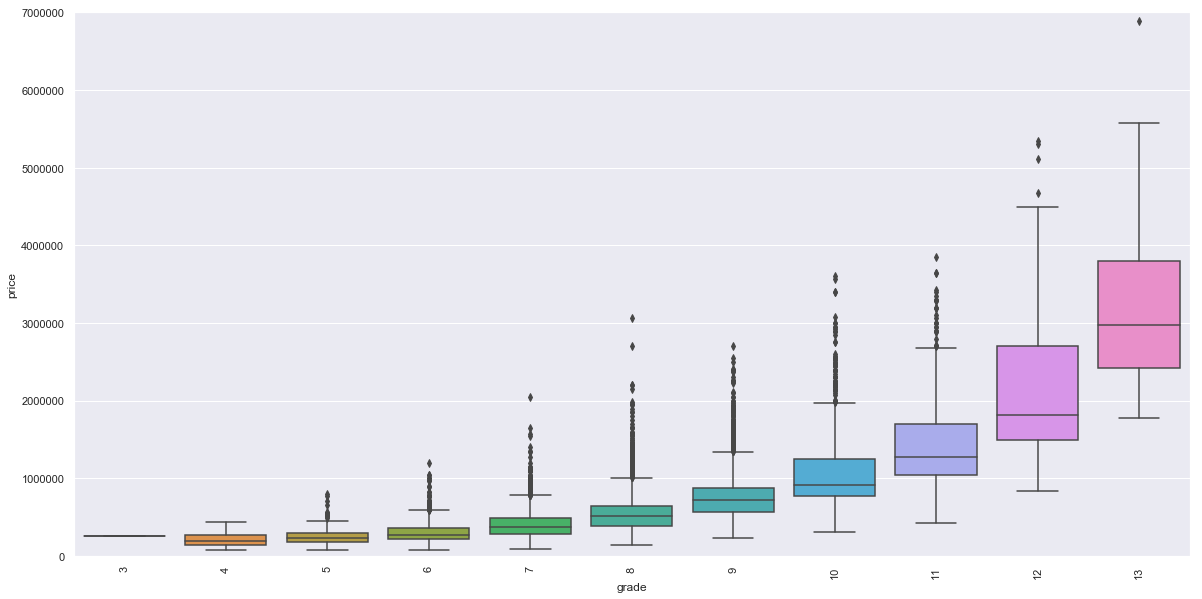

In [97]:
data = pd.concat([df['price'], df['grade']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='grade', y='price', data=data)

fig.axis(ymin=0, ymax=7000000);
plt.xticks(rotation=90);

In [98]:
dimensions = (20, 10)

def relplot(data_frame, x, col, y='price'):
    return sns.relplot(x=x,
                       y=y,
                       hue=y,
                       col=col,
                       size=y,
                       sizes=(5, 500),
                       col_wrap=3,
                       data=df,
                       palette='gist_heat_r');


def scatter_plot(data_frame, x, y='price'):
    fig, ax = plt.subplots(figsize=dimensions)
    return sns.scatterplot(ax=ax, x=x, y=y, hue=x, size=x, data=data_frame, palette='gist_heat_r')


def regression_plot(data_frame, x, y='price'):
    fig, ax = plt.subplots(figsize=dimensions)
    return sns.regplot(ax=ax, x=x, y=y, data=data_frame)

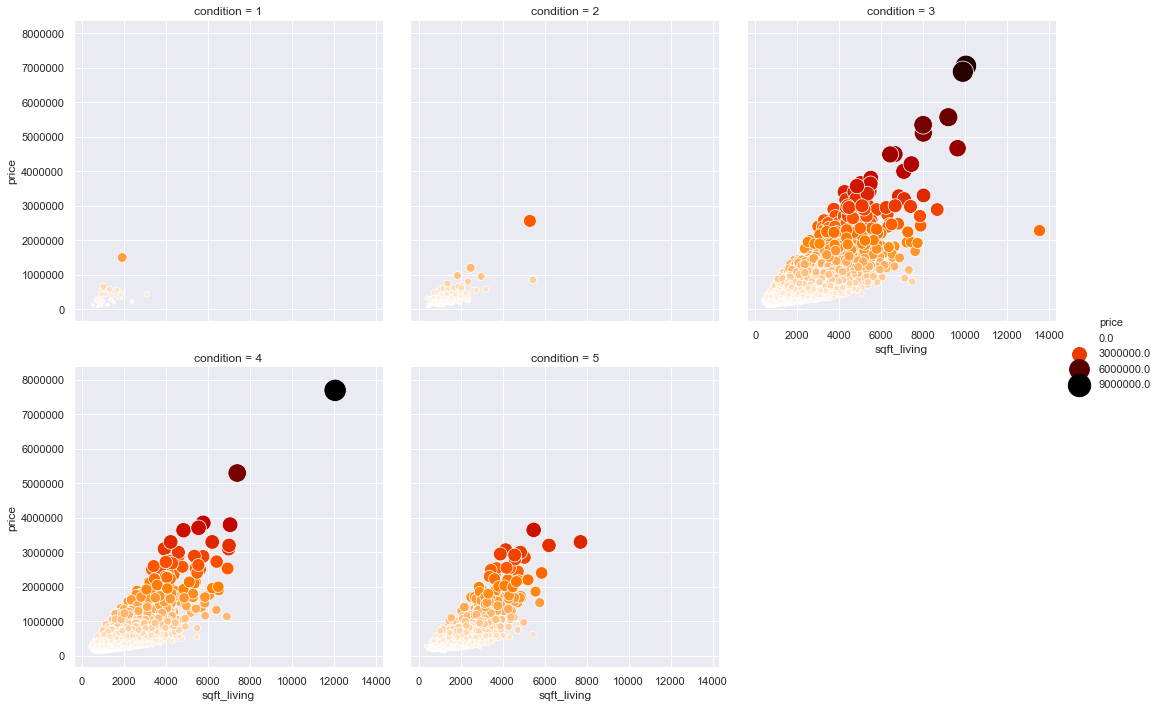

In [99]:
relplot(df, 'sqft_living', col='condition');

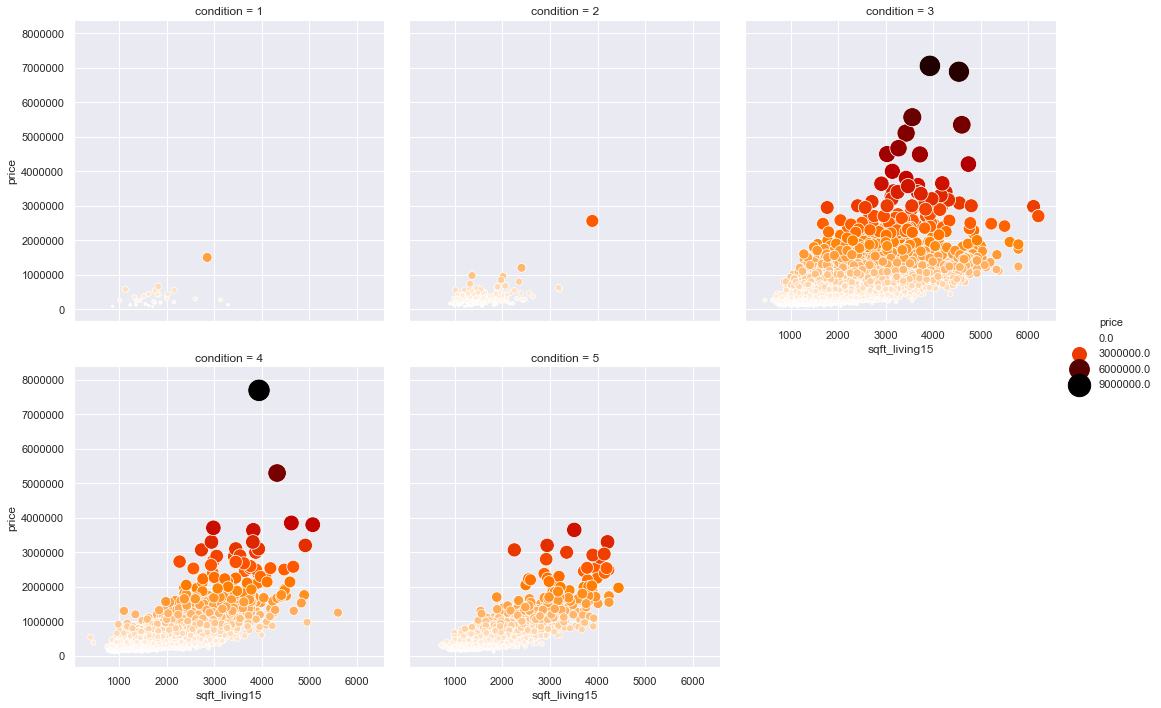

In [100]:
relplot(df, 'sqft_living15', 'condition');

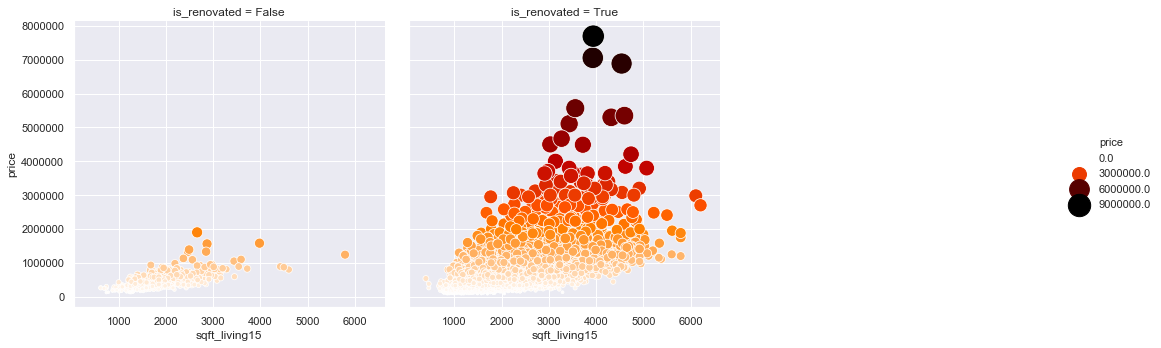

In [105]:
relplot(df, 'sqft_living15', 'is_renovated');

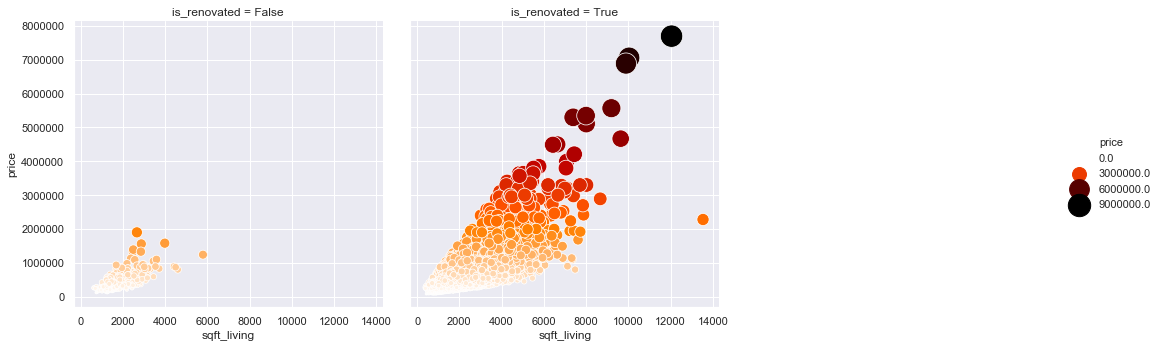

In [106]:
relplot(df, 'sqft_living', 'is_renovated');

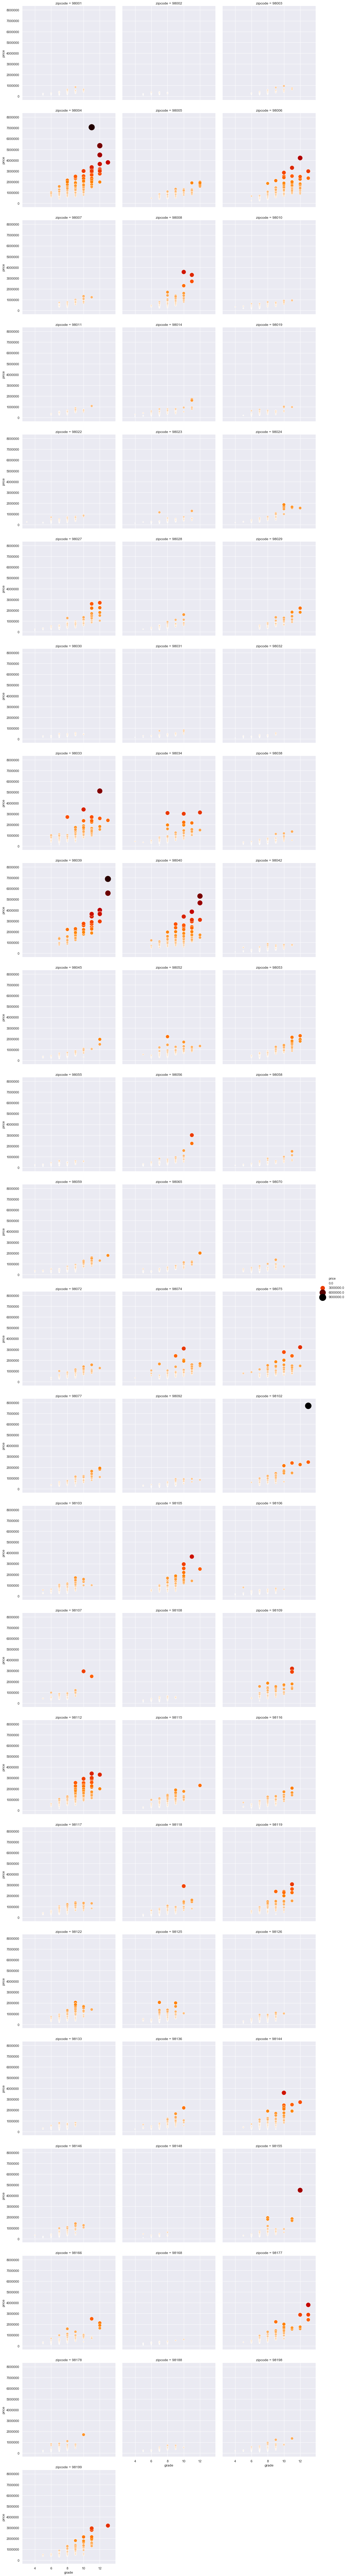

In [237]:
relplot(df, 'grade', col='zipcode');

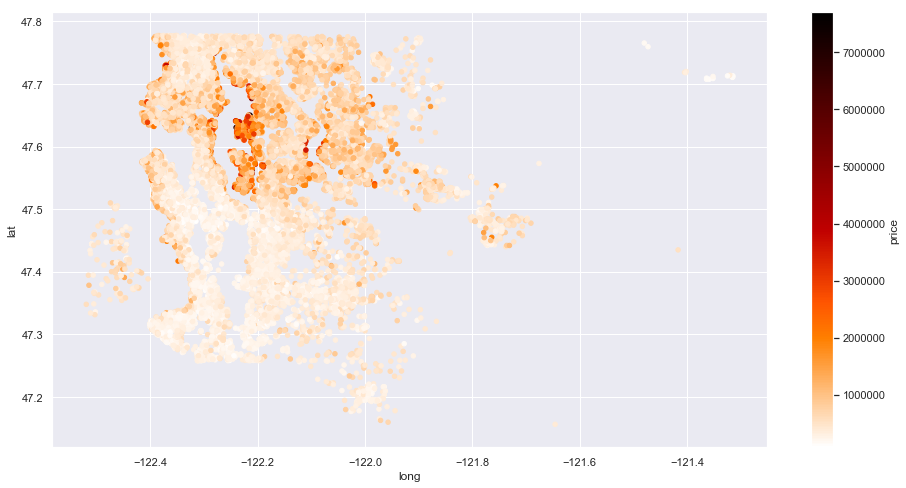

In [110]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.show();

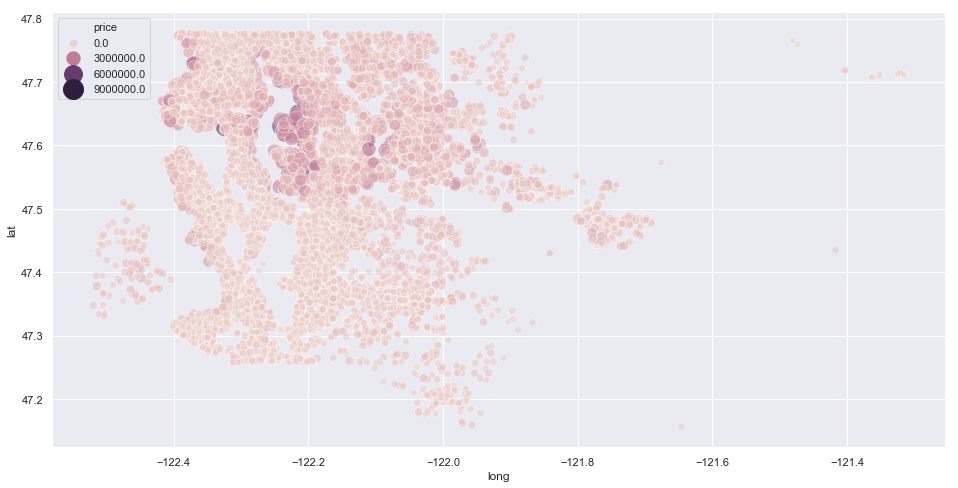

In [123]:
#scatter_plot(df, 'long', 'lat');
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(ax=ax,
                x='long',
                y='lat',
                hue='price',
                size='price',
                sizes=(40, 400),
                alpha=.5,
                data=df);

##### Credits

Credits for this approach of visualizing house prices goes to [osterburg/king-county](https://www.kaggle.com/osterburg/king-county/data).

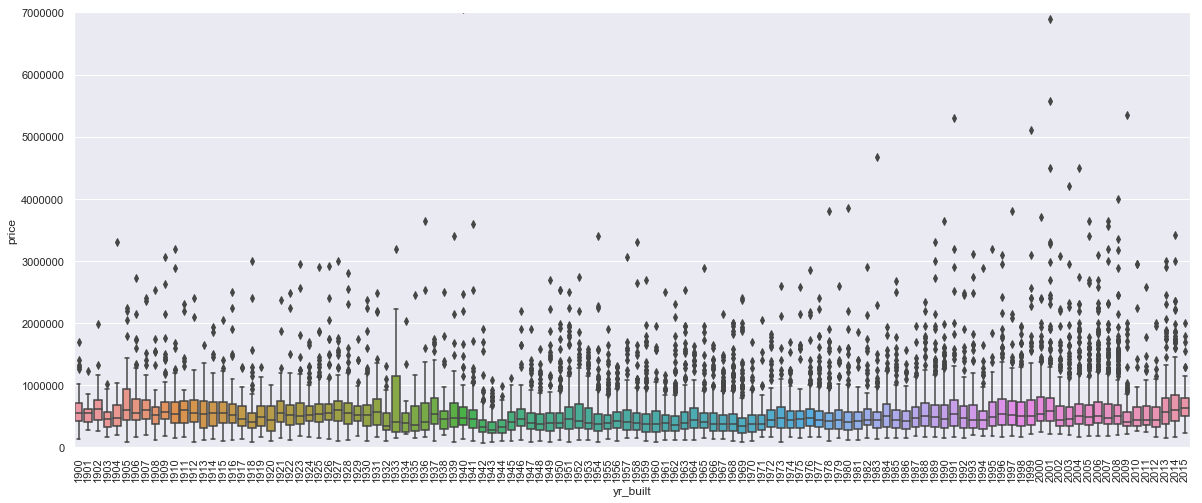

In [124]:
data = pd.concat([df['price'], df['yr_built']], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x='yr_built', y='price', data=data)
fig.axis(ymin=0, ymax=7000000);
plt.xticks(rotation=90);

### Feature Engineering

In [125]:
def get_model(data_frame, feature_name, target_name):
    X = data_frame[feature_name]
    X = sm.add_constant(X)
    y = data_frame[target_name]
    return sm.OLS(y, X).fit()


def get_r_squared_for_feature(data_frame, feature_name, target_name='price'):
    return get_model(data_frame, feature_name, target_name).summary()


def collect_r_squared(data_frame, exclude_features, target_name='price'):
    acc = []

    for c in data_frame.columns:
        if c not in exclude_features:
            acc.append(dict(name=c, value=get_model(data_frame, c, target_name).rsquared))

            sorted_by = sorted(acc, key=lambda d: d['value'])
    for d in sorted_by:
        print("{}: {}".format(d['name'], d['value']))

In [135]:
collect_r_squared(df, [
    'id',
    'date',
    'price',
    'waterfront',
    'view',
    'long',
    'lat',
    'sqft_basement',
    'yr_renovated',
    'is_renovated',
    'zipcode'
])

condition: 0.0013000622131942308
yr_built: 0.002910962192005928
sqft_lot15: 0.00686328262138447
sqft_lot: 0.008077735099594086
floors: 0.06594805661983039
bedrooms: 0.0953497028373066
bathrooms: 0.27657672267607736
sqft_living15: 0.34250726417201927
sqft_above: 0.36647034726583827
grade: 0.44615823299735013
sqft_living: 0.49268789904035093


In [136]:
get_r_squared_for_feature(df, 'grade')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:58:28   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
feature_name = 'sqft_living'

/Users/florian/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


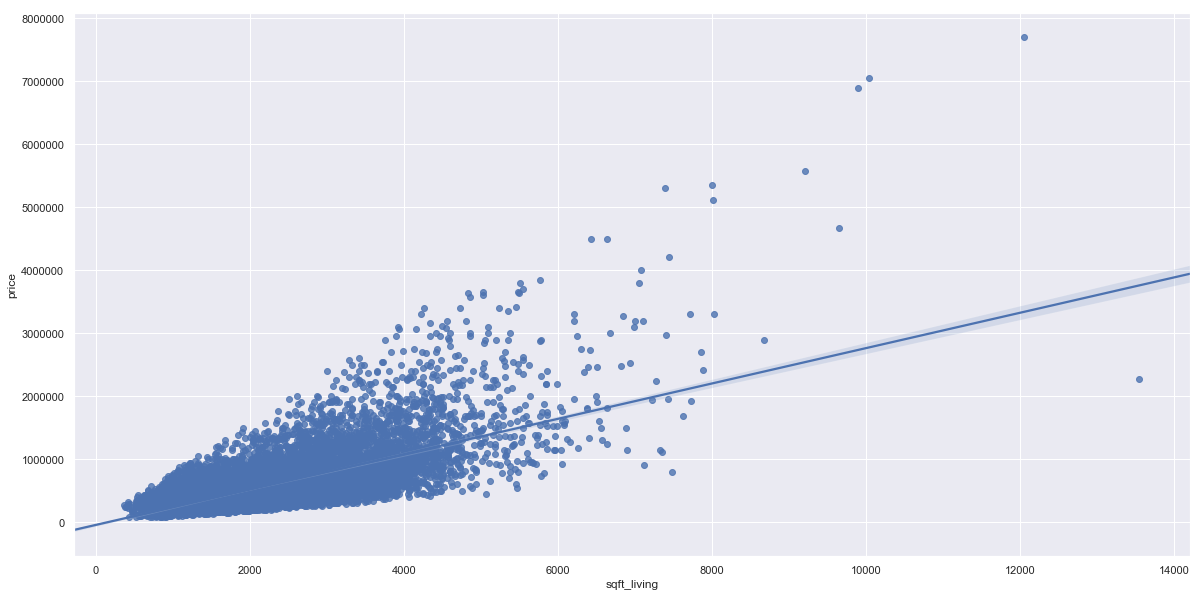

In [138]:
ax = regression_plot(df, feature_name)

In [139]:
get_r_squared_for_feature(df, feature_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:58:33   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
feature_name = 'sqft_living15'

/Users/florian/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


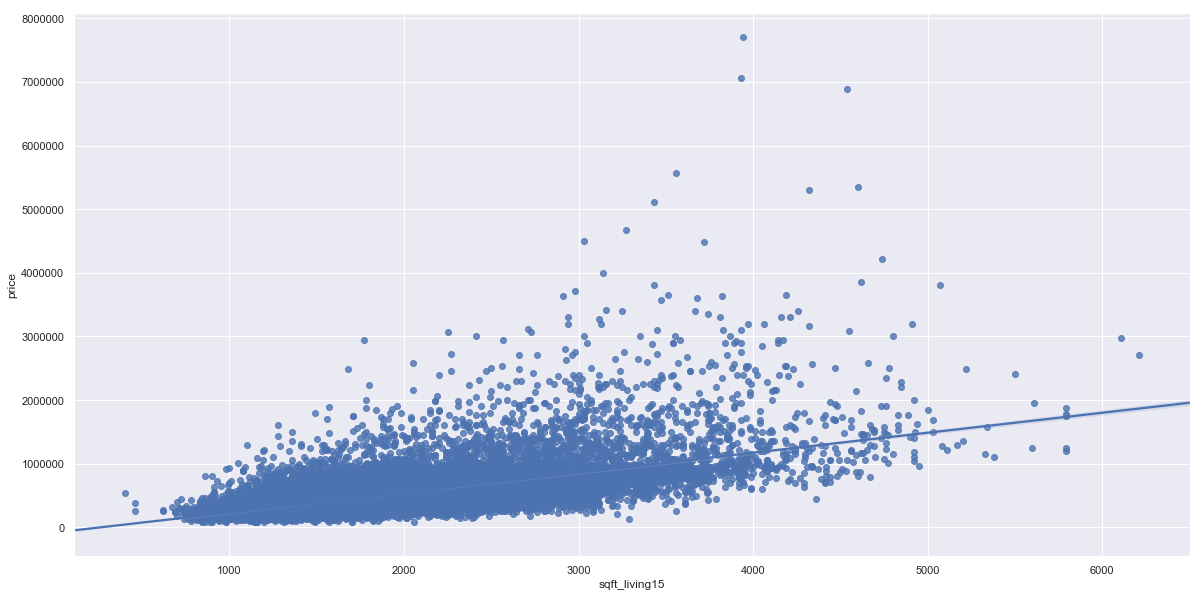

In [144]:
ax = regression_plot(df, feature_name)

In [145]:
get_r_squared_for_feature(df, feature_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:59:01   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
feature_name = 'bathrooms'

/Users/florian/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


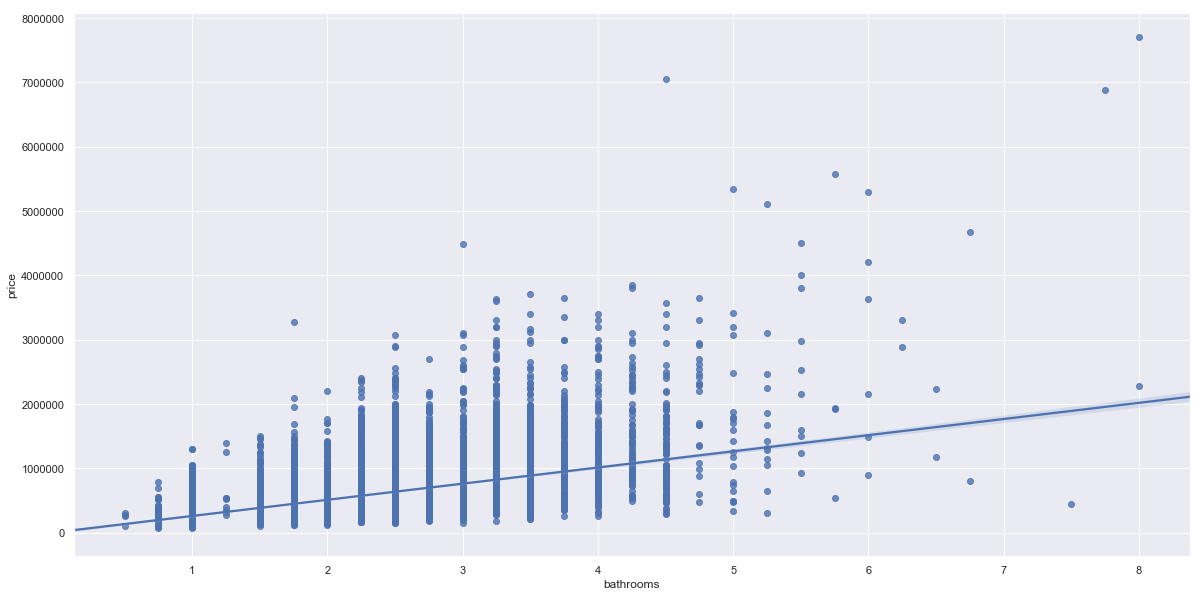

In [147]:
ax = regression_plot(df, feature_name)

In [148]:
get_r_squared_for_feature(df, feature_name)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:59:03   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
"""
condition
yr_built
sqft_lot15
sqft_lot
floors
bedrooms
bathrooms
sqft_living15
sqft_above
grade
sqft_living
"""

import statsmodels.formula.api as smf

def build_multi_variable_regression_model(features):
    model = 'price ~ {}'.format(' + '.join(features))
    model = smf.ols(formula=model, data=df).fit()
    return model.summary()


In [221]:
build_multi_variable_regression_model(['grade', 'sqft_living'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:47:53   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.028e+05   1.33e+04    -45.181      0.000   -6.29e+05   -5.77e+05
grade        9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
sqft_living   184.1215      2.872     64.102      0.000     178.491     189.751
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
build_multi_variable_regression_model(['grade', 'sqft_living', 'sqft_above'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8494.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:47:55   Log-Likelihood:            -2.9897e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21593   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.564e+05   1.36e+04    -48.298      0.000   -6.83e+05    -6.3e+05
grade        1.108e+05   2325.608     47.637      0.000    1.06e+05    1.15e+05
sqft_living   234.5900      4.039     58.075      0.000     226.672     242.508
sqft_above    -78.0959      4.427    -17.642      0.000     -86.773     -69.419
==============================================================================
Omnibus:                    17102.886   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1062513.676
Skew:                           3.332   Prob(JB):                         0.00
Kurtosis:                      36.709   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
build_multi_variable_regression_model(['grade', 'sqft_living', 'sqft_above', 'bathrooms'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6434.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:47:55   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.554e+05   1.36e+04    -48.353      0.000   -6.82e+05   -6.29e+05
grade        1.159e+05   2366.154     48.968      0.000    1.11e+05    1.21e+05
sqft_living   252.4879      4.353     58.000      0.000     243.955     261.021
sqft_above    -77.1922      4.416    -17.482      0.000     -85.847     -68.537
bathrooms   -3.723e+04   3431.175    -10.849      0.000    -4.4e+04   -3.05e+04
==============================================================================
Omnibus:                    17067.412   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1065708.366
Skew:                           3.319   Prob(JB):                         0.00
Kurtosis:                      36.767   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
build_multi_variable_regression_model(['grade', 'sqft_living', 'sqft_above', 'bathrooms', 'bedrooms'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     5287.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:47:56   Log-Likelihood:            -2.9876e+05
No. Observations:               21597   AIC:                         5.975e+05
Df Residuals:                   21591   BIC:                         5.976e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.321e+05   1.51e+04    -35.189      0.000   -5.62e+05   -5.02e+05
grade        1.081e+05   2388.964     45.240      0.000    1.03e+05    1.13e+05
sqft_living   278.5092      4.560     61.076      0.000     269.571     287.447
sqft_above    -79.5515      4.385    -18.140      0.000     -88.147     -70.956
bathrooms    -2.57e+04   3466.618     -7.413      0.000   -3.25e+04   -1.89e+04
bedrooms     -4.09e+04   2287.730    -17.878      0.000   -4.54e+04   -3.64e+04
==============================================================================
Omnibus:                    16605.589   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           946221.018
Skew:                           3.206   Prob(JB):                         0.00
Kurtosis:                      34.786   Cond. No.                     2.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
build_multi_variable_regression_model(['grade', 'sqft_living', 'bedrooms', 'sqft_lot'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6427.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:47:57   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.644e+05   1.49e+04    -31.068      0.000   -4.94e+05   -4.35e+05
grade        9.168e+04   2257.555     40.611      0.000    8.73e+04    9.61e+04
sqft_living   219.9313      3.344     65.771      0.000     213.377     226.486
bedrooms    -4.453e+04   2273.484    -19.585      0.000    -4.9e+04   -4.01e+04
sqft_lot       -0.3141      0.042     -7.550      0.000      -0.396      -0.233
==============================================================================
Omnibus:                    16358.207   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           863323.017
Skew:                           3.157   Prob(JB):                         0.00
Kurtosis:                      33.323   Cond. No.                     3.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
build_multi_variable_regression_model(['grade', 'sqft_living15', 'bathrooms', 'bedrooms', 'sqft_lot15'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     3945.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:47:58   Log-Likelihood:            -3.0038e+05
No. Observations:               21597   AIC:                         6.008e+05
Df Residuals:                   21591   BIC:                         6.008e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.807e+05   1.41e+04    -62.451      0.000   -9.08e+05   -8.53e+05
grade          1.416e+05   2469.295     57.354      0.000    1.37e+05    1.46e+05
sqft_living15   107.3039      3.918     27.385      0.000      99.624     114.984
bathrooms      4.979e+04   3453.253     14.419      0.000     4.3e+04    5.66e+04
bedrooms       6233.3949   2306.083      2.703      0.007    1713.302    1.08e+04
sqft_lot15       -0.2463      0.067     -3.650      0.000      -0.379      -0.114
==============================================================================
Omnibus:                    19809.026   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2085173.462
Skew:                           4.047   Prob(JB):                         0.00
Kurtosis:                      50.452   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Testing The Model

In [230]:
y = df['price']
X = df[['grade', 'sqft_living15', 'bedrooms', 'sqft_lot15']]
sm.add_constant(X)
X.head()

grade  sqft_living15  bedrooms  sqft_lot15
0      7           1340         3        5650
1      7           1690         3        7639
2      6           2720         2        8062
3      7           1360         4        5000
4      8           1800         3        7503

In [231]:
model = sm.OLS(y, X).fit() # ordinary least squares
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                 2.081e+04
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:49:16   Log-Likelihood:            -3.0277e+05
No. Observations:               21597   AIC:                         6.055e+05
Df Residuals:                   21593   BIC:                         6.056e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade          2.582e+04   1381.660     18.691      0.000    2.31e+04    2.85e+04
sqft_living15   222.1230      4.006     55.454      0.000     214.272     229.974
bedrooms      -2.283e+04   2299.391     -9.930      0.000   -2.73e+04   -1.83e+04
sqft_lot15       -0.3211      0.075     -4.262      0.000      -0.469      -0.173
==============================================================================
Omnibus:                    21720.338   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2446517.630
Skew:                           4.732   Prob(JB):                         0.00
Kurtosis:                      54.275   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""